# The goal of the project is to help the company generate incremental sales by implementing a recommender system.
Data Prep and Modelling
1. Missing data
2. Calculate find the most popular product using maximum sales by volume and dollar amount
3. Company with a maximum purchase
4. Build a popularity-based recommender system
5. Build a recommender system using matrix factorization
6. Cosine similarity for product description

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
import missingno as msng

In [2]:
df = pd.read_csv("/content/PBL 5 recommendation data.csv", encoding = "latin-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [4]:
df.head(1)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.2,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284

In [13]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_price,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status
count,4194.000000,4.194000e+03,101.0,2114.000000,5.000000,3.000000,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,4194.000000,3737.000000,3999.000000,882.000000,882.000000,278.000000,364.000000,4194.000000,351.000000,3.000000,4189.000000,4.176000e+03,4176.000000,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,4194.000000,4194.000000,4191.000000,24.000000,1008.000000,4037.000000,4037.000000,4037.000000,4037.000000,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,4.037000e+03,2959.000000,3.130000e+03,3917.000000,592.000000,2334.0,2334.0,3.728000e+03,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,2920.000000,2786.000000,122.000000,2080.000000,3998.000000,3998.000000,3998.000000,659.000000,387.000000,3930.000000
mean,1796.518121,1.440971e+09,0.0,0.979659,0.200000,7.333333,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,131.925196,0.800838,7.141263,20.403628,9.972676,14.752590,13.086676,137.192818,47.981396,18.000000,2.958940,1.443104e+09,134.842263,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,1.858846,67.349132,51.112718,1.666667,1.916667,4518.398068,0.987119,1.629676,3.400297,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,1.462428e+09,0.940858,2.865179e+13,61.543528,89.727855,199.0,22005.0,1.450329e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,0.166438,65.059943,181.696967,0.064423,17.208216,10.872750,11.592447,15.487041,3.863049,0.876336
std,1065.679090,1.887681e+07,0.0,0.141196,0.447214,0.577350,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,231.156869,4.859280,4.531500,11.850291,14.617203,32.755244,51.296654,222.898475,209.843126,6.928203,0.312482,1.809258e+07,213.804804,1.508683,1.814291e+07,9.118822e+06,1.793374e+07,NaN,0.102062,0.375087,5802.466202,5276.541078,5577.392427,8.821959,95.571793,74.155515,0.916831,0.399851,5614.454744,1.386196,1.420626,2.248065,245.856090,98.829781,72.405928,74.691642,16246.897822,1.236169,1.586206e+06,0.235929,1.794757e+13,5.086931,85.097197,0.0,0.0,4.029036e+05,0.0,19.334049,51.129537,14.010066,3.583533e+11,508.461157,0.372537,94.714484,312.357568,0.245564,10.508782,6.781847,10.250909,22.256617,2.098446,1.364374
min,3.000000,1.386089e+09,0.0,0.000000,0.000000,7.000000,1.437559e+09,0.000000,23.000000,3.000000,30.000000,6.638000e+01,2.890000,0.000000,0.000000,4.000000,0.000000,0.010000,0.020000,2.890000,0.000000,10.000000,0.000000,1.

In [14]:
df.describe(include="object")

,Customers.fname,Customers.lname,Customers.company,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.external_source,Orders.currency,Orders.fee_name,Orders.discount_name,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_id,Orders.payment_code,Orders.comments,Orders.notes,Order_Items.product_name,Order_Items.attribute_names,Products.template,Products.name,Products.display_name,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.thefind_cat,Products.quickbooks_id,Products.short_description,Products.long_description,Products.video,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_url,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.rx,Products.latex,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.notes,Products.features_title,Products.warranty,Products.user_size,Products.assembly,Products.installation,Products.handling_time,Products.rotation_link,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id
count,4194,4194,727,4194,4194,728,4194,365,4194,227,282,3577,3751,3818,1380,3810,722,3764,3446,287,1276,4194,51,3973,4037,3662,4032,4034,238,1700,2,2935,4015,3780,3979,4011,2334,2334,2321,3728,3015,4008,676,4011,565,1158,9,4037,3985,2890,16,2964,635,1939,622,652,1360,1357,3288,446,2,663,616,616,616,998,200,313,1443,802,155,162,3869
unique,1631,2557,425,1636,2559,427,3565,3,1,19,26,11,14,695,5,5,4,3135,2848,212,253,1821,1,2,1391,1220,101,1706,1,98,1,976,1,1541,313,5,1,1,1,1521,1008,1214,62,1686,40,206,2,1710,20,195,14,14,2,9,167,182,374,203,201,39,1,25,15,2,3,6,72,148,319,73,17,13,1002
top,John,Ceccotti,Company145,John,Ceccotti,Company145,16186,Ebay,USD,Fee,Discount,fedex,11|Ground,7.96468E+14,abe,authorize.net,Credit Card,0,02708Z,For David,Phone Order,Medline MoliCare Super Plus Disposable Adult D...,|,sub-product-detail.html,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",MEDLINE,NON80328Z,unisex,Blue,adult,B00AXNRDMW,health-care-products,online:en:US:1842,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,Health & Beauty > Medical Supplies > Medical Aids,8000115D-1434302135,"BAG,EMESIS,SICKNESS CLEAN-UP,CLEAN SACK","<ul><li> 12"" (30.5 cm) wheels and handbrakes o...",Rth66cdnHZM,"Emesis/Barf Bags, Blue - 24 Pack | Medline- NO...",Lightweight and durable transport wheelchair w...,"transport wheelchair, transport wheelchairs, l...",Drive Medical | Trigger Release Lightweight Fo...,Emesis-BagsBlue-2,EA,1 Each / Each,10/100/1000Cs,1 CS,No,Yes,http://www.medline.com/media/catalog/Docs/MSDS...,MSD_SDS0230.pdf,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,Listed on Ebay,Powder-coated colored steel frame with black c...,Limited Lifetime,Universal,Basic Assembly Required,No Installation Required,Ships Same Day,https://www.drivemedical.com/patient-room/1306...,With Back,Medium,Plastic Rim,Desk Length Removable - Swing Away Foot Rest,"20"" x 16""",PF21897
freq,46,41,27,46,41,27,10,363,4194,127,213,2304,2474,271,968,3454,373,15,10,15,528,53,51,3886,103,88,2672,88,238,405,2,88,4015,88,214,3649,2334,2334,2321,88,103,134,136,88,134,134,6,88,1773,879,2,1337,616,1188,34,34,210,225,783,87,2,389,510,311,420,616,20,16,124,103,83,70,134


## 1. Missing Data

In [5]:
print("Eksik veri sayısı:\n",df.isnull().sum().sort_values(ascending=False))

Eksik veri sayısı:
 Products.freight_cost             4194
Orders.mailing                    4194
Orders.gift_message               4194
Orders.registry_id                4194
Products.right_flag               4194
Orders.sales_rep                  4194
Products.markup                   4194
Orders.payment_ref                4194
Products.websites                 4194
Orders.purchase_order             4194
Orders.gift_id                    4194
Orders.gift_amount                4194
Products.price_breaks             4194
Products.seo_footer               4194
Products.default_quantity         4194
Orders.shipping_flags             4194
Products.price_break_type         4194
Orders.shipping_trans             4194
Orders.website                    4194
Products.amazon_type              4194
Order_Items.account_id            4194
Order_Items.attributes            4194
Order_Items.attribute_prices      4194
Products.menu_name                4194
Order_Items.registry_item         4194
Order

<Axes: >

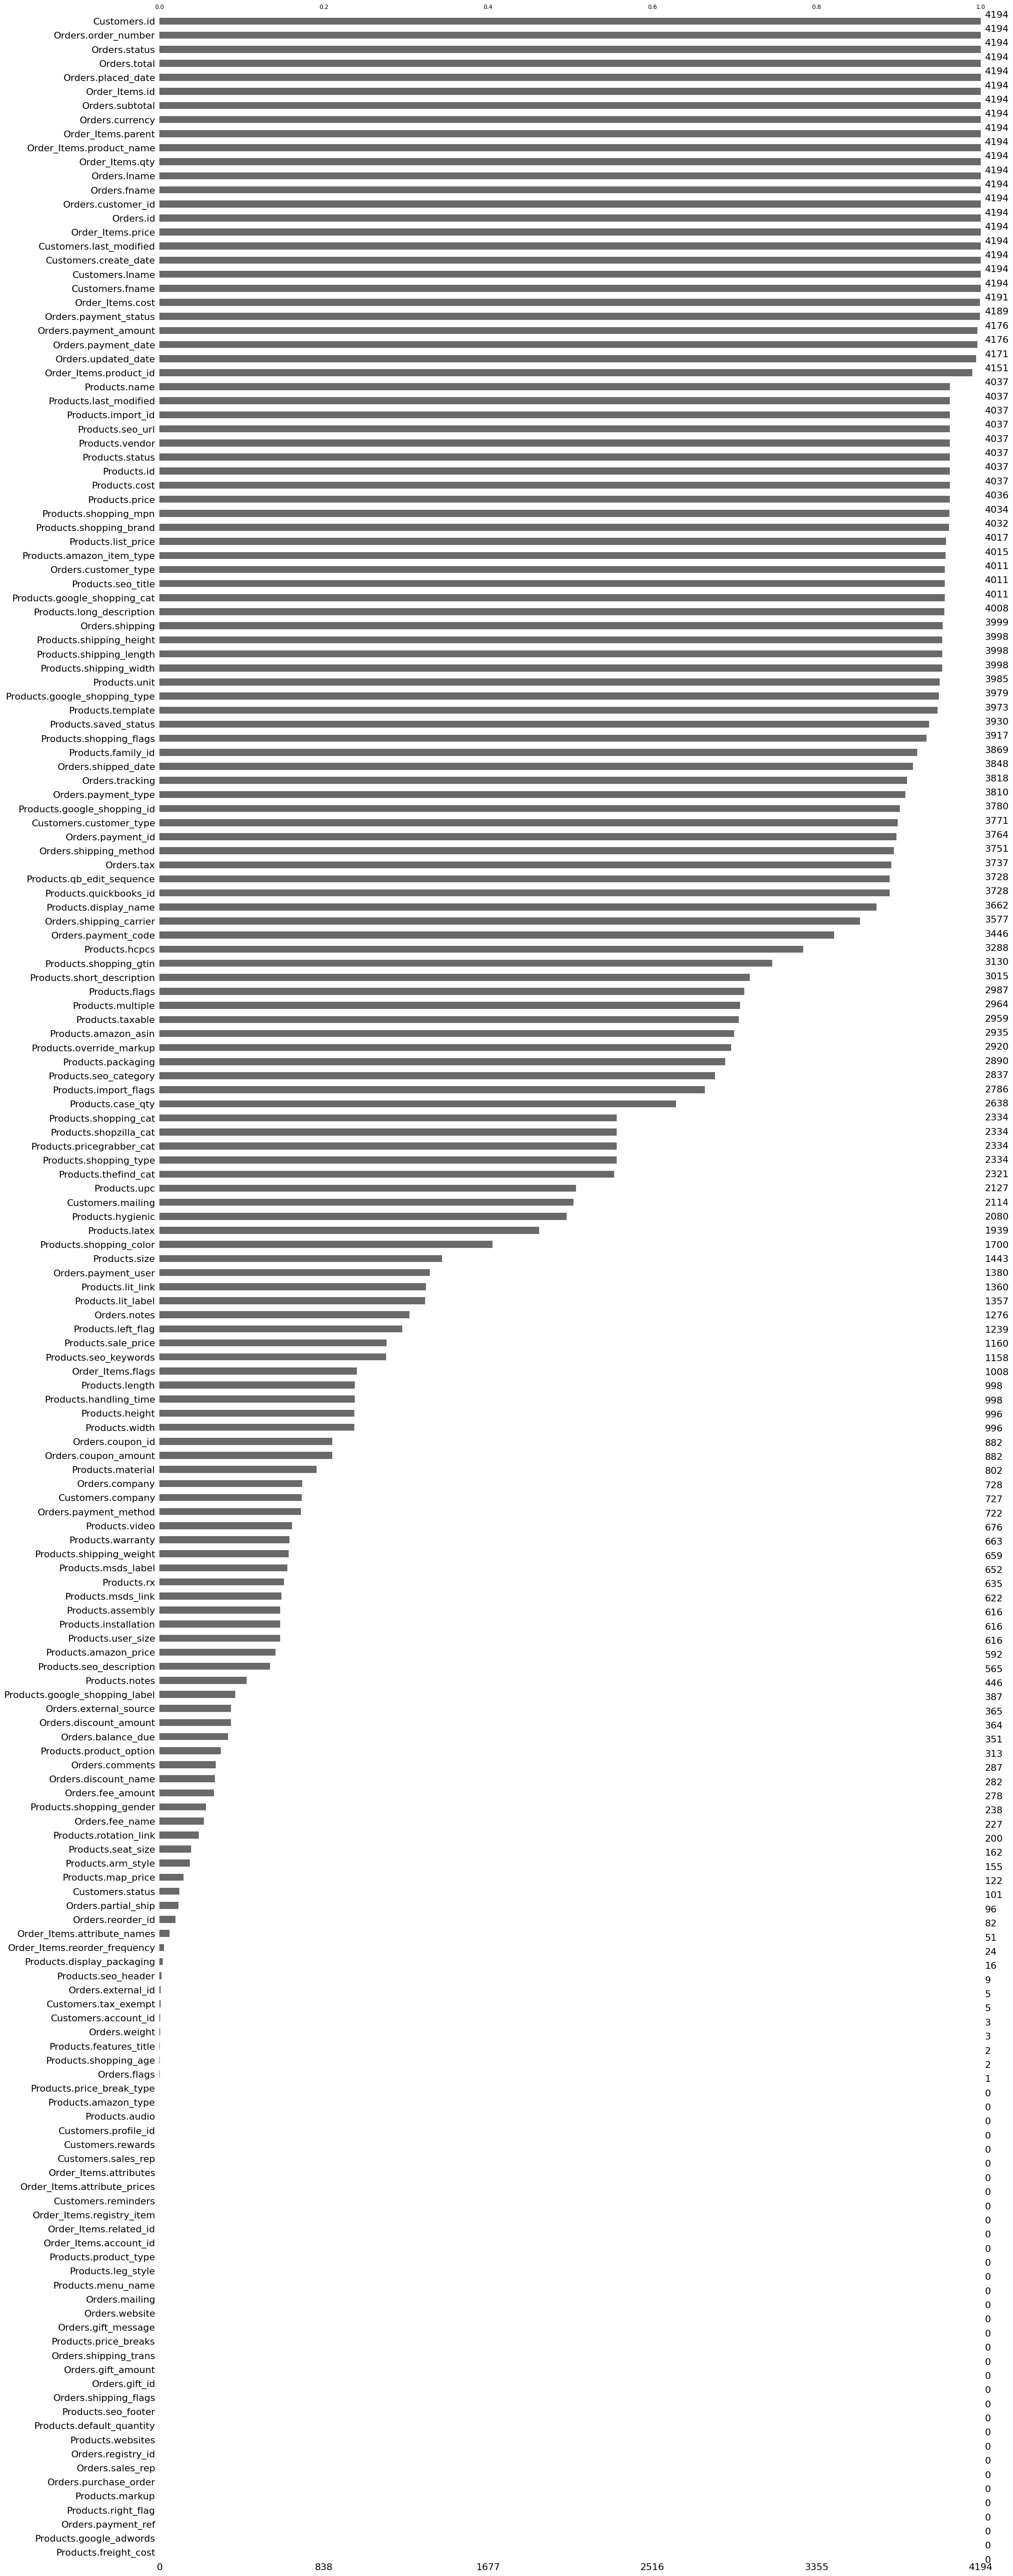

In [6]:
msng.bar(df,sort="ascending",) # Sütun doluluk oranları

In [7]:
# Hiç veri içermeyen sütunları silelim
df = df.dropna(axis=1, how='all')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 147 entries, Customers.id to Products.saved_status
dtypes: float64(64), int64(10), object(73)
memory usage: 4.7+ MB


## 2. Calculate find the most popular product using maximum sales by volume and dollar amount

In [36]:
# En çok satan ürünü bulma
en_cok_satan = df.groupby('Order_Items.product_id').agg({
    'Order_Items.qty': 'sum',
    'Orders.subtotal': 'sum'
}).sort_values(['Order_Items.qty', 'Orders.subtotal'], ascending=False).head(1)

print("En çok satan ürün:\n", en_cok_satan)

# En çok satan ürünün ID'sini alma
en_cok_satan_id = en_cok_satan.index[0]

# Bu ID'ye sahip ürünün bilgilerini alma
en_cok_satan_urun = df[df['Order_Items.product_id'] == en_cok_satan_id].iloc[0]

# Ürün bilgilerini yazdırma
print("\nEn çok satan ürün detayları:")
print(f"Ürün ID: {en_cok_satan_urun['Products.id']}")
print(f"Ürün Adı: {en_cok_satan_urun['Products.name']}")
print(f"Kısa Açıklama: {en_cok_satan_urun['Products.short_description']}")
print(f"Fiyat: ${en_cok_satan_urun['Products.price']:.2f}")
print(f"Toplam Satış Miktarı: {en_cok_satan['Order_Items.qty'].values[0]}")
print(f"Toplam Satış Tutarı: ${en_cok_satan['Orders.subtotal'].values[0]:.2f}")

En çok satan ürün:
                         Order_Items.qty  Orders.subtotal
Order_Items.product_id                                  
1846.0                              396         13781.12

En çok satan ürün detayları:
Ürün ID: 1846.0
Ürün Adı: Disposable Emergency Blanket,Not Applicable
Kısa Açıklama: BLANKET,EMERGENCY,POLY,GRAY,40"X80",10CS
Fiyat: $34.61
Toplam Satış Miktarı: 396
Toplam Satış Tutarı: $13781.12


## 3. Company with a maximum purchase

In [37]:
# En çok alışveriş yapan şirketi bulma
en_cok_alisveris = df.groupby('Customers.company').agg({
    'Orders.total': 'sum'
}).sort_values('Orders.total', ascending=False).head(1)  # En çok alışveriş yapan şirketi bulma

print("\nEn çok alışveriş yapan şirket:\n", en_cok_alisveris)  # En çok alışveriş yapan şirketi yazdırma


En çok alışveriş yapan şirket:
                    Orders.total
Customers.company              
Company59              12790.69


## 4. Build a popularity-based recommender system

In [42]:
# Popülerlik tabanlı öneri sistemi oluşturma
popularity_df = df.groupby('Products.id').agg({
    'Order_Items.qty': 'sum',
    'Orders.subtotal': 'sum',
    'Products.name': 'first'  # Ürün adını korumak için
}).reset_index()

popularity_df['popularity_score'] = popularity_df['Order_Items.qty'] * popularity_df['Orders.subtotal']
popularity_df = popularity_df.sort_values('popularity_score', ascending=False)

print("En popüler 10 ürün:\n")
print(popularity_df[['Products.id', 'Products.name', 'popularity_score']].head(20))

En popüler 10 ürün:

      Products.id                                      Products.name  \
600        1846.0        Disposable Emergency Blanket,Not Applicable   
662        2107.0      MoliCare Disposable Super Plus Briefs,27"-47"   
566        1672.0  2-Ply Tissue/Poly Professional Towels,Not Appl...   
557        1648.0                Sanitary Pads with Adhesive & Wings   
257         911.0  Aluminum Transport Chair with 12" Wheels,Red,F...   
256         910.0  Aluminum Transport Chair with 12" Wheels,Blue,...   
663        2109.0      MoliCare Disposable Super Plus Briefs,39"-59"   
221         858.0                    K1 Basic Extra-Wide Wheelchairs   
607        1867.0                        Silent Knight Pill Crushers   
605        1862.0                 Silent Knight Pill Crusher Pouches   
495        1469.0  Protection Plus Super Protective Adult Underwe...   
599        1842.0                         Emesis Bags,Blue,36.000 OZ   
133         493.0                          

In [46]:
# Popüler ürünleri öneren fonksiyon
def get_popular_recommendations(n=5):
    return popularity_df[['Products.name', 'popularity_score']].head(n)

get_popular_recommendations()

,Products.name,popularity_score
600,"Disposable Emergency Blanket,Not Applicable",5457323.52
662,"MoliCare Disposable Super Plus Briefs,27""-47""",2886635.04
566,"2-Ply Tissue/Poly Professional Towels,Not Appl...",1223068.00
557,Sanitary Pads with Adhesive & Wings,748598.48
257,"Aluminum Transport Chair with 12"" Wheels,Red,F...",597159.68


## 5. Build a recommender system using matrix factorization

In [43]:
# Matris faktörizasyonu için veri hazırlama
user_item_matrix = df.pivot_table(
    index='Customers.id',
    columns='Order_Items.product_id',
    values='Order_Items.qty',
    aggfunc='sum',
    fill_value=0
)

In [50]:
# Matrisi float tipine dönüştürme, yoksa svd çalışmıyor
user_item_matrix = user_item_matrix.astype(float)

In [51]:
# SVD uygulama
U, sigma, Vt = svds(user_item_matrix.values, k=10)

In [52]:
# Sigma matrisini köşegen matrise dönüştürme
sigma = np.diag(sigma)

In [53]:
# Tahmin matrisini oluşturma
user_predictions = np.dot(np.dot(U, sigma), Vt) + user_item_matrix.mean().mean()

In [54]:
# Tahmin DataFrame'ini oluşturma
predictions_df = pd.DataFrame(user_predictions, columns=user_item_matrix.columns, index=user_item_matrix.index)

In [60]:
# Matris faktörizasyonu tabanlı önerileri üreten fonksiyon
def get_mf_recommendations(user_id, n=5):
    user_ratings = user_item_matrix.loc[user_id]
    recommendations = (predictions_df.loc[user_id][user_ratings == 0]
                       .sort_values(ascending=False)
                       .head(n))

    result = []
    for product_name, predicted_rating in recommendations.items():
        result.append({
            'Products.name': product_name,
            'Predicted Rating': predicted_rating
        })

    return pd.DataFrame(result)

# Örnek bir kullanıcı ID'si seçme
ornek_kullanici_id = user_item_matrix.index[0]

print("\nMatris faktörizasyonu tabanlı öneriler (Kullanıcı ID: {})".format(ornek_kullanici_id))
print(get_mf_recommendations(ornek_kullanici_id))


Matris faktörizasyonu tabanlı öneriler (Kullanıcı ID: 3)
   Products.name  Predicted Rating
0         2107.0          0.001355
1          493.0          0.001355
2         1469.0          0.001355
3         1259.0          0.001355
4         1228.0          0.001355


## 6. Cosine similarity for product description

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektörizasyonu için
from sklearn.metrics.pairwise import cosine_similarity  # Kosinüs benzerliği hesaplaması için

In [70]:
# Veri setini okuma
df = pd.read_csv('PBL 5 recommendation data.csv', encoding='latin-1')  # CSV dosyasını okuyup DataFrame'e yükleme

# Ürün adı, kısa açıklama ve uzun açıklama sütunlarını belirleme
urun_adi_sutunu = 'Products.name'  # Ürün adı sütunu
kisa_aciklama_sutunu = 'Products.short_description'  # Kısa açıklama sütunu
uzun_aciklama_sutunu = 'Products.long_description'  # Uzun açıklama sütunu

In [71]:
# Eksik değerleri kontrol etme ve temizleme
df = df.dropna(subset=[urun_adi_sutunu, kisa_aciklama_sutunu, uzun_aciklama_sutunu])  # Eksik değerleri olan satırları silme

# Tekrar eden ürünleri kaldırma
df = df.drop_duplicates(subset=[urun_adi_sutunu])  # Tekrar eden ürünleri kaldırma

In [72]:
# Ürün adı, kısa açıklama ve uzun açıklamayı birleştirme
df['combined_text'] = df[urun_adi_sutunu] + ' ' + df[kisa_aciklama_sutunu] + ' ' + df[uzun_aciklama_sutunu]  # Metinleri birleştirme

# TF-IDF Vektörizasyonu
vectorizer = TfidfVectorizer(stop_words='english')  # TF-IDF vektörizasyonu için nesne oluşturma
metin_vektorleri = vectorizer.fit_transform(df['combined_text'])  # Birleştirilmiş metinleri vektörize etme

In [73]:
# Kosinüs benzerliğini hesaplama
benzerlik_matrisi = cosine_similarity(metin_vektorleri)  # Vektörler arasındaki kosinüs benzerliğini hesaplama

In [74]:
# Benzerlik matrisini DataFrame'e dönüştürme
benzerlik_df = pd.DataFrame(benzerlik_matrisi, index=df[urun_adi_sutunu], columns=df[urun_adi_sutunu])  # Benzerlik matrisini DataFrame'e dönüştürme

print("Ürün benzerlik matrisi (ilk 5x5):\n", benzerlik_df.iloc[:5, :5])  # İlk 5x5'lik kısmı yazdırma

Ürün benzerlik matrisi (ilk 5x5):
 Products.name                                Basic Steel Rollators,Green  \
Products.name                                                              
Basic Steel Rollators,Green                                     1.000000   
Urinary Drain Bags                                              0.055012   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                     0.063342   
Basket for 2-Button Walkers                                     0.061940   
TENS 3000 Analog Unit                                           0.090706   

Products.name                                Urinary Drain Bags  \
Products.name                                                     
Basic Steel Rollators,Green                            0.055012   
Urinary Drain Bags                                     1.000000   
SensiCare Nitrile Exam Gloves,Blue,XX-Large            0.047771   
Basket for 2-Button Walkers                            0.046006   
TENS 3000 Analog Unit         

In [77]:
# Belirli bir ürüne en benzer ürünleri bulma fonksiyonu
def en_benzer_urunler(urun_adi, n=5):
    benzerlikler = benzerlik_df.loc[urun_adi].sort_values(ascending=False)  # Benzerlik skorlarını sıralama
    return benzerlikler.iloc[1:n+1]  # İlk ürün kendisi olduğu için 1'den başlayarak en benzer n ürünü döndürme

# Örnek bir ürün için en benzer ürünleri bulma
ornek_urun = df[urun_adi_sutunu].iloc[0]  # İlk ürünü örnek olarak kullanma
print(f"\n'{ornek_urun}' ürününe en benzer 5 ürün:")
print(en_benzer_urunler(ornek_urun))  # Örnek ürüne en benzer 5 ürünü yazdırma


'Basic Steel Rollators,Green' ürününe en benzer 5 ürün:
Products.name
Basic Steel Rollators,Blue                                 0.921691
Basic Steel Rollators,Red                                  0.882861
Basic Steel Rollators,Burgundy,6"                          0.781415
Basic Rollators,Green                                      0.301451
Stainless Steel Bedpans,Stainless Steel,Stainless Steel    0.268528
Name: Basic Steel Rollators,Green, dtype: float64
